# PROJECT AKHIR KECERDASAN BUATAN B1 2020 

### Kelompok 2:

2009106067 Mar'atus Sholeha

2009106064 Krisdayanti

2009106058 Rista Safitri

### Import Library yang Dibutuhkan

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import string
import re
import matplotlib.pyplot as plt

# Data Collecting

### Import Dataset

In [70]:
dataset = pd.read_csv("dataset_youtube.csv")
dataset

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes,Category Comment
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280,neutral
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13,neutral
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzryH8U6Dz_yBmIgEZ4AaABAg,LR ICED WOLF,3.2 Million comments if you find mine your a l...,2020-03-15T21:11:08Z,370547,positive
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugw61yKNdyVJ5T4R_sN4AaABAg,MemeDille,The ones who are NOT from Tik-Tok can like thi...,2020-09-08T08:44:47Z,94,negative
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxcqxyEw2jU7KvhofV4AaABAg,cruisendude,The first viewer must feel like the king of th...,2020-08-21T23:15:01Z,36446,positive
...,...,...,...,...,...,...,...,...
1494,Chris Brown - Loyal (Official Video) ft. Lil W...,ChrisBrownVEVO,Ugx0v_kwt_OjHumTf314AaABAg,TheNastyMan 420,Good job chris on the 1 bil. I knew this song ...,2020-09-06T02:21:45Z,7,positive
1495,Chris Brown - Loyal (Official Video) ft. Lil W...,ChrisBrownVEVO,UgzmGOdpkEGRQmGDoyd4AaABAg,Yuvraj Sahota,Lets see whos here from september to december ...,2020-09-03T22:12:07Z,2,positive
1496,Chris Brown - Loyal (Official Video) ft. Lil W...,ChrisBrownVEVO,UgyZwUKM_fkKAA2S9IZ4AaABAg,Rod Reactz,1 billion views this song is so underrated,2020-09-08T15:14:08Z,1,neutral
1497,Chris Brown - Loyal (Official Video) ft. Lil W...,ChrisBrownVEVO,UgyOHVIZqvR3WfqErRJ4AaABAg,Zawad Hossain,"As soon as this hits 1 Billi, everyone go to C...",2020-08-25T17:31:20Z,208,positive


# PREPROCCESING

### Menampilkan dataset berdasarkan kolom comment & category comment

In [71]:
dataset = pd.DataFrame(dataset[['Comment','Category Comment']])
dataset

,Comment,Category Comment
0,The people who liked this comment is officiall...,neutral
1,Let's be honest this wasn't your recommendatio...,neutral
2,3.2 Million comments if you find mine your a l...,positive
3,The ones who are NOT from Tik-Tok can like thi...,negative
4,The first viewer must feel like the king of th...,positive
...,...,...
1494,Good job chris on the 1 bil. I knew this song ...,positive
1495,Lets see whos here from september to december ...,positive
1496,1 billion views this song is so underrated,neutral
1497,"As soon as this hits 1 Billi, everyone go to C...",positive


### Menghapus beberapa karakter yang ada di dalam comment

In [72]:
dataset['Comment'] = dataset['Comment'].str.replace('(@\w+.*?)',"")
dataset['Comment'] = dataset['Comment'].str.replace('(#\w+.*?)',"")
dataset['Comment'] = dataset['Comment'].str.replace('(&\w+.*?)',"")
dataset['Comment'] = dataset['Comment'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
dataset['Comment'] = dataset['Comment'].str.replace(r"[\"\'\|\?\=\.\@\#\*\,]", '')
dataset['Comment'] = dataset['Comment'].str.replace(r"[0-9]", '')
dataset['Comment'] = dataset['Comment'].str.replace(r'  ', ' ')
dataset['Comment'] = dataset['Comment'].str.replace(r'   ', ' ')
dataset['Comment'] = dataset['Comment'].str.replace(r"[\,\+\_\-\:\!\%\;\/\\]", ' ')

### Menghapus single character

In [73]:
def remove_singl_char(teks):
    return re.sub(r"\b[a-zA-Z]\b", "", teks)

dataset['Comment'] = dataset['Comment'].apply(remove_singl_char)

### Menghapus indentasi (:) pada kolom Comment di dataset

In [74]:
def remove_whitespace_LT(teks):
    return teks.strip()

dataset['Comment'] = dataset['Comment'].apply(remove_whitespace_LT)

### Menghapus spasi double

In [75]:
def remove_whitespace_multiple(teks):
    return re.sub('\s+',' ',teks)

dataset['Comment'] = dataset['Comment'].apply(remove_whitespace_multiple)

### Menghapus tanda baca pada kolom Comment dataset

In [76]:
def remove_punctuation(teks):
    return teks.translate(str.maketrans("","",string.punctuation))

dataset['Comment'] = dataset['Comment'].apply(remove_punctuation)

### Mengubah semua guruf menjadi huruf kecil

In [77]:
dataset['Comment'] = dataset['Comment'].str.lower()
dataset

,Comment,Category Comment
0,the people who liked this comment is officiall...,neutral
1,lets be honest this wasnt your recommendation ...,neutral
2,million comments if you find mine your legend,positive
3,the ones who are not from tik tok can like thi...,negative
4,the first viewer must feel like the king of th...,positive
...,...,...
1494,good job chris on the bil knew this song would...,positive
1495,lets see whos here from september to december,positive
1496,billion views this song is so underrated,neutral
1497,as soon as this hits billi everyone go to chri...,positive


### Menghapus Comment yang mengandung akhiran titik 3 (contoh: lol...)

In [78]:
dataset_titik_ilang=[]
for i in dataset.index:
  #re.sub("[A-Za-z0-9]+\.{3}", "", df['text'][i])
  dataset_titik_ilang.append(re.sub("[A-Za-z0-9]+\*", "", dataset['Comment'][i]))

dataset['Comment'] = pd.DataFrame(dataset_titik_ilang)

### Melihat dataset seletah proses menghapus @.. dan hashtag, menghapus url, link, dan karakter spesial

In [79]:
dataset

,Comment,Category Comment
0,the people who liked this comment is officiall...,neutral
1,lets be honest this wasnt your recommendation ...,neutral
2,million comments if you find mine your legend,positive
3,the ones who are not from tik tok can like thi...,negative
4,the first viewer must feel like the king of th...,positive
...,...,...
1494,good job chris on the bil knew this song would...,positive
1495,lets see whos here from september to december,positive
1496,billion views this song is so underrated,neutral
1497,as soon as this hits billi everyone go to chri...,positive


### Mengecek apakah di dalam dataset terdapat kolom yang bernilai null

In [80]:
dataset.isna().sum()

Comment             0
Category Comment    0
dtype: int64

### Mengecek apakah di dalam dataset terdapat data duplikat (terdapat 2 data yang sama)

In [81]:
dataset.Comment.duplicated().sum()

216

### Menampilkan  data dari dataset yang nilainya sama (merupakan duplikasi)

In [82]:
dataset.loc[dataset.Comment.duplicated(), :]

,Comment,Category Comment
10,the people who liked this comment is officiall...,neutral
13,the people who liked this comment is officiall...,neutral
14,the people who liked this comment is officiall...,neutral
15,the people who liked this comment is officiall...,neutral
27,the people who liked this comment is officiall...,neutral
...,...,...
1451,im surprised nintendo hasnt striked drake for ...,neutral
1452,listening to this to remember the old days whe...,positive
1453,drake is the type of person to install air con...,neutral
1477,its crazy how we are listening to these songs ...,positive


### Menghapus data duplikat di didalam dataset

In [83]:
dataset_bersih = dataset.drop_duplicates(subset=["Comment"])
dataset_bersih.reset_index(drop=True, inplace = True)

### Mengecek kembali ke dalam dataset apakah dataset yang digunakan masih memiliki data duplikat

In [84]:
dataset_bersih.Comment.duplicated().sum()

0

### Mengecek shape (baris dan kolom)

In [85]:
dataset_bersih.shape

(1283, 2)

### Menyimpan dataset yang sudah dibersikhan ke dalam dataset baru

In [86]:
dataset_bersih.to_csv('dataset_youtube_bersih.csv')

### Import dataset baru

In [87]:
df_bersih = pd.read_csv('dataset_youtube_bersih.csv')
df_bersih

,Unnamed: 0,Comment,Category Comment
0,0,the people who liked this comment is officiall...,neutral
1,1,lets be honest this wasnt your recommendation ...,neutral
2,2,million comments if you find mine your legend,positive
3,3,the ones who are not from tik tok can like thi...,negative
4,4,the first viewer must feel like the king of th...,positive
...,...,...,...
1278,1278,good job chris on the bil knew this song would...,positive
1279,1279,lets see whos here from september to december,positive
1280,1280,billion views this song is so underrated,neutral
1281,1281,as soon as this hits billi everyone go to chri...,positive


### Menghapus kolom Unnamed: 0 yg terdapat dalam dataset

In [88]:
del df_bersih['Unnamed: 0']

### Melihat data target, label encoding, dan menjadikan nilai neutral = 0, positive = 1, & negative = 2

In [89]:
df_bersih['Target_type'] = df_bersih['Category Comment'].map({'neutral': 0, 'positive':1, 'negative': 2})
df_bersih

,Comment,Category Comment,Target_type
0,the people who liked this comment is officiall...,neutral,0
1,lets be honest this wasnt your recommendation ...,neutral,0
2,million comments if you find mine your legend,positive,1
3,the ones who are not from tik tok can like thi...,negative,2
4,the first viewer must feel like the king of th...,positive,1
...,...,...,...
1278,good job chris on the bil knew this song would...,positive,1
1279,lets see whos here from september to december,positive,1
1280,billion views this song is so underrated,neutral,0
1281,as soon as this hits billi everyone go to chri...,positive,1


### Melihat jumlah data berdasarkan Category Comment

In [90]:
df_bersih['Category Comment'].value_counts()

positive    813
neutral     360
negative    110
Name: Category Comment, dtype: int64

In [91]:
#Melakukan Oversampling
df_negatif = df_bersih.loc[df_bersih['Category Comment'] == 'negative']
df_negatif_gabungan = pd.concat([df_negatif,df_negatif,df_negatif,df_negatif])
df_negatif_gabungan.reset_index(drop = True, inplace = True)
df_negatif_gabungan

,Comment,Category Comment,Target_type
0,the ones who are not from tik tok can like thi...,negative,2
1,these dislikes were people from who didnt sing...,negative,2
2,can you stop liking now the notifications gett...,negative,2
3,only people who didnt came from tik tok are wo...,negative,2
4,it has mor dislikes than de average likes of b...,negative,2
...,...,...,...
435,never really liked this song but the meme like...,negative,2
436,no nudes no drugs no alcohol just some meme ma...,negative,2
437,this sounds so weird without the wii shop musi...,negative,2
438,if you mess with me like rohan once did youre ...,negative,2


In [92]:
#menggabungkan data minor oversampling ke dalam dataset
data_final = pd.concat([df_bersih,df_negatif_gabungan])
data_final.reset_index(drop=True, inplace = True)
data_final

,Comment,Category Comment,Target_type
0,the people who liked this comment is officiall...,neutral,0
1,lets be honest this wasnt your recommendation ...,neutral,0
2,million comments if you find mine your legend,positive,1
3,the ones who are not from tik tok can like thi...,negative,2
4,the first viewer must feel like the king of th...,positive,1
...,...,...,...
1718,never really liked this song but the meme like...,negative,2
1719,no nudes no drugs no alcohol just some meme ma...,negative,2
1720,this sounds so weird without the wii shop musi...,negative,2
1721,if you mess with me like rohan once did youre ...,negative,2


### TOKENISASI

In [93]:
def token(teks):
  nstr = teks.split(" ")
  dt = []
  a = -1
  for i in nstr:
    a = a + 1
  if i == '':
    dt.append(a)
  p = 0
  b = 0
  for q in dt:
    b = q - p
    del nstr[b]
    p = p + 1
  return nstr

In [94]:
data_final['Comment'] = data_final['Comment'].apply(token)

In [95]:
data_final

,Comment,Category Comment,Target_type
0,"[the, people, who, liked, this, comment, is, o...",neutral,0
1,"[lets, be, honest, this, wasnt, your, recommen...",neutral,0
2,"[million, comments, if, you, find, mine, your,...",positive,1
3,"[the, ones, who, are, not, from, tik, tok, can...",negative,2
4,"[the, first, viewer, must, feel, like, the, ki...",positive,1
...,...,...,...
1718,"[never, really, liked, this, song, but, the, m...",negative,2
1719,"[no, nudes, no, drugs, no, alcohol, just, some...",negative,2
1720,"[this, sounds, so, weird, without, the, wii, s...",negative,2
1721,"[if, you, mess, with, me, like, rohan, once, d...",negative,2


## hapus stopwords

In [96]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('english')
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data_final['Comment'] = data_final['Comment'].apply(stopwords_removal) 


data_final['Comment'].head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0          [people, liked, comment, officially, views]
1      [lets, honest, wasnt, recommendation, searched]
2              [million, comments, find, mine, legend]
3                      [ones, tik, tok, like, comment]
4       [first, viewer, must, feel, like, king, world]
5             [imagine, many, peoples, come, everyday]
6                       [comments, find, mine, legend]
7                                 [came, check, views]
8    [imagine, many, armys, coming, every, secondsm...
9                                         [hey, mikee]
Name: Comment, dtype: object

### STEMMING

In [97]:
!pip install english-dictionary
!pip install nltk
!pip install english-word
!pip install swifter
import swifter


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement english-word (from versions: none)
ERROR: No matching distribution found for english-word

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [99]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [100]:
#create an object of class PorterStemmer
porter = PorterStemmer()

#proide a word to be stemmed
print("Porter Stemmer Testing")
print("cats \t\t:", porter.stem("cats"))
print("troble \t\t:", porter.stem("trouble"))
print("troubling \t:", porter.stem("troubling"))
print("troubled \t:", porter.stem("troubled"))

Porter Stemmer Testing
cats 		: cat
troble 		: troubl
troubling 	: troubl
troubled 	: troubl


In [101]:
# stemmed
def stemmed_wrapper(term):
    return porter.stem(term)

term_dict = {}

for document in data_final['Comment']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_final['Comment'] = data_final['Comment'].swifter.apply(get_stemmed_term)
print(data_final['Comment'])

2074
------------------------
people : peopl
liked : like
comment : comment
officially : offici
views : view
lets : let
honest : honest
wasnt : wasnt
recommendation : recommend
searched : search
million : million
comments : comment
find : find
mine : mine
legend : legend
ones : one
tik : tik
tok : tok
like : like
first : first
viewer : viewer
must : must
feel : feel
king : king
world : world
imagine : imagin
many : mani
peoples : peopl
come : come
everyday : everyday
came : came
check : check
armys : armi
coming : come
every : everi
secondsminuteshours : secondsminuteshour
hey : hey
mikee : mike
dislikes : dislik
didnt : didnt
sing : sing
despacito : despacito
carefully : care
stop : stop
liking : like
notifications : notif
getting : get
annoying : annoy
population : popul
dont : dont
worry : worri
youre : your
one : one
whos : who
watching : watch
quarantine : quarantin
look : look
person : person
reading : read
new : new
song : song
reached : reach
worthy : worthi
billion : billion
h

Pandas Apply:   0%|          | 0/1723 [00:00<?, ?it/s]

0                    [peopl, like, comment, offici, view]
1                 [let, honest, wasnt, recommend, search]
2                  [million, comment, find, mine, legend]
3                          [one, tik, tok, like, comment]
4          [first, viewer, must, feel, like, king, world]
                              ...                        
1718    [never, realli, like, song, meme, like, natur,...
1719                  [nude, drug, alcohol, meme, materi]
1720    [sound, weird, without, wii, shop, music, back...
1721                      [mess, like, rohan, your, dead]
1722                   [hate, peopl, misspel, zayn, zyan]
Name: Comment, Length: 1723, dtype: object


### MODELING

In [102]:
# library for train test split
from sklearn.model_selection import train_test_split

# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models, regularizers,initializers
from sklearn.model_selection import StratifiedKFold 

#Confusion Matrix
from sklearn.metrics import confusion_matrix

In [103]:
X = data_final['Comment'].values
y = data_final['Target_type'].values

In [104]:
X

array([list(['peopl', 'like', 'comment', 'offici', 'view']),
       list(['let', 'honest', 'wasnt', 'recommend', 'search']),
       list(['million', 'comment', 'find', 'mine', 'legend']), ...,
       list(['sound', 'weird', 'without', 'wii', 'shop', 'music', 'background']),
       list(['mess', 'like', 'rohan', 'your', 'dead']),
       list(['hate', 'peopl', 'misspel', 'zayn', 'zyan'])], dtype=object)

In [105]:
y

array([0, 0, 1, ..., 2, 2, 2], dtype=int64)

In [106]:
# Split data into train, val and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train

array([list(['dislik', 'peopl', 'still', 'count', 'dollar', 'star']),
       list(['im', 'pakistan', 'dont', 'understand', 'word', 'music', 'awesom']),
       list(['nostalgia', 'song', 'physic', 'hurt']), ...,
       list(['friend', 'tri', 'help', 'experi']),
       list(['need', 'everyth', 'stop', 'hate', 'life', 'hurt', 'lot']),
       list(['edit', 'comment', 'wouldnt', 'know', 'get', 'mani', 'like'])],
      dtype=object)

In [107]:
NUM_WORDS = 15000

tokenizer = Tokenizer(num_words=NUM_WORDS, split=' ')
tokenizer.fit_on_texts(x_train)

In [108]:
x_train_token = tokenizer.texts_to_sequences(x_train)
x_test_token = tokenizer.texts_to_sequences(x_test)

In [109]:
MAXLEN = 250

x_train_padding = pad_sequences(x_train_token, maxlen=MAXLEN, padding='pre', truncating='post')
x_test_padding = pad_sequences(x_test_token, maxlen=MAXLEN, padding='pre', truncating='post')

In [110]:
# Defining parameters
max_len = 80
trunc_type = "post" # 80 Kata Pertama.. "pre" -> 80 Kata Terakhir
padding_type = "post" 
oov_tok = "" 
vocab_size = 14202 #jumlah maksimum kata yang disimpan

# embedding_dim = 16
# drop_value = 0.2

In [111]:
tokenizer = Tokenizer(num_words = vocab_size, char_level = False, oov_token = oov_tok)
tokenizer.fit_on_texts(x_train)

In [112]:
# Get the word_index by using tokenizer
word_index = tokenizer.word_index
word_index

{'': 235,
 'song': 2,
 'like': 3,
 'peopl': 4,
 'year': 5,
 'dislik': 6,
 'listen': 7,
 'comment': 8,
 'watch': 9,
 'still': 10,
 'mani': 11,
 'one': 12,
 'know': 13,
 'video': 14,
 'girl': 15,
 'dont': 16,
 'get': 17,
 'time': 18,
 'came': 19,
 'your': 20,
 'see': 21,
 'never': 22,
 'old': 23,
 'legend': 24,
 'day': 25,
 'im': 26,
 'music': 27,
 'guy': 28,
 'look': 29,
 'love': 30,
 'rememb': 31,
 'come': 32,
 'let': 33,
 'cant': 34,
 'back': 35,
 'everyon': 36,
 'billion': 37,
 'go': 38,
 'view': 39,
 'feel': 40,
 'imagin': 41,
 'make': 42,
 'life': 43,
 'everi': 44,
 'got': 45,
 'think': 46,
 'good': 47,
 'didnt': 48,
 'world': 49,
 'ever': 50,
 'hit': 51,
 'kid': 52,
 'quarantin': 53,
 'girlfriend': 54,
 'made': 55,
 'would': 56,
 'search': 57,
 'danc': 58,
 'read': 59,
 'man': 60,
 'person': 61,
 'realli': 62,
 'best': 63,
 'sing': 64,
 'isnt': 65,
 'thought': 66,
 'hear': 67,
 'lol': 68,
 'singl': 69,
 'liter': 70,
 'later': 71,
 'use': 72,
 'talk': 73,
 'fact': 74,
 'believ': 75

In [113]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding

In [114]:
model = Sequential([
    Embedding(input_dim=NUM_WORDS, input_length=MAXLEN, output_dim=16),
    tf.keras.layers.Bidirectional(LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(LSTM(32)),
    Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 250, 16)           240000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 250, 128)         41472     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 3)                

In [115]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.9):
      print("\nAkurasi validasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = MyCallback()

In [116]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [117]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [118]:
EPOCHS = 15
BATCH_SIZE = 32

history = model.fit(x_train_padding,
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_test_padding, y_test),
                    verbose=2,
                    callbacks=[callbacks, early_stopping])

Epoch 1/15
44/44 - 32s - loss: 1.0695 - accuracy: 0.4586 - val_loss: 1.0332 - val_accuracy: 0.5246 - 32s/epoch - 726ms/step
Epoch 2/15
44/44 - 17s - loss: 0.9224 - accuracy: 0.5929 - val_loss: 0.7515 - val_accuracy: 0.7188 - 17s/epoch - 381ms/step
Epoch 3/15
44/44 - 17s - loss: 0.5699 - accuracy: 0.7663 - val_loss: 0.6449 - val_accuracy: 0.7275 - 17s/epoch - 380ms/step
Epoch 4/15
44/44 - 16s - loss: 0.3924 - accuracy: 0.8440 - val_loss: 0.5439 - val_accuracy: 0.7565 - 16s/epoch - 369ms/step
Epoch 5/15
44/44 - 16s - loss: 0.3213 - accuracy: 0.8846 - val_loss: 0.5203 - val_accuracy: 0.7971 - 16s/epoch - 371ms/step
Epoch 6/15
44/44 - 17s - loss: 0.2341 - accuracy: 0.9194 - val_loss: 0.5966 - val_accuracy: 0.7565 - 17s/epoch - 379ms/step
Epoch 7/15
44/44 - 17s - loss: 0.2775 - accuracy: 0.9194 - val_loss: 0.7256 - val_accuracy: 0.7188 - 17s/epoch - 380ms/step
Epoch 8/15
44/44 - 17s - loss: 0.2135 - accuracy: 0.9231 - val_loss: 0.8085 - val_accuracy: 0.7159 - 17s/epoch - 378ms/step
Epoch 9/

In [119]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

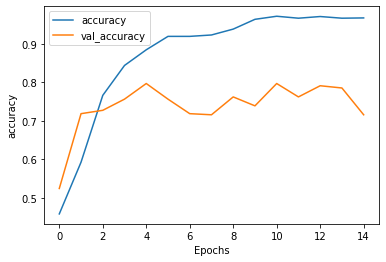

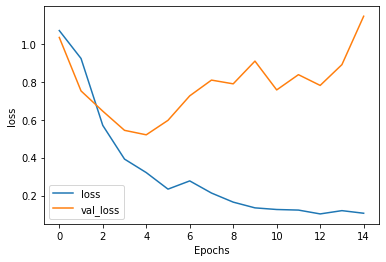

In [120]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')